{'p_levene': 0.03655549218337195,
 'p_welch': 0    0.000003
 Name: p-unc, dtype: float64,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.058284
 1  Burster_h         FS  0.008795
 2  Burster_h         RS  0.017781
 3  Burster_l         FS  0.001147
 4  Burster_l         RS  0.074499
 5         FS         RS  0.003760}

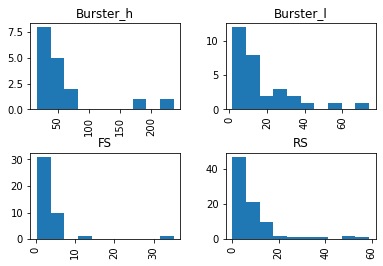

In [2]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import pingouin as pg

path = 'C:/Users/Ping/Documents/MATLAB/Xblaster3_Chamber3_GIT/XPL_code/Paper_code_and_spreadsheets/CSV'
os.chdir(path)

def group_comp (filename,grouptype,paramname):
    df = pd.read_csv(filename+'.csv')
    df = df.loc[df[paramname].notna(),:]
    #print(df.columns)
    summary = dict()
    
    switcher = {
        'crit': ['RS','FS','Burster_h','Burster_l'],
        'gmm' : ['RS','FS','Burster']
    }
    
    groupnames = switcher.get(grouptype)
    #print(groupnames)
    
    if groupnames==None:
        raise Exception('Group type must be \'crit\' or \'gmm\' ')
    
    key = 'Group_'+grouptype
    df = df.loc[df[key].isin(groupnames),:]
    #print(df['Group_'+grouptype].unique())    

    df[paramname].hist(by=df[key])
    
    # All Levene's tests seemed to reject the null for equality of variances 
    # Check for equality of variances again after log transform - in the end still reject null
    if ~np.any(df[paramname]==0):     # Cannot take log of zero
        df.loc[:,'log'+paramname] = np.log2(df[paramname])
        values_per_group = [col for col_name, col in df.groupby(key)['log'+paramname]]
        stat, p_levene = stats.levene(*values_per_group)
        summary['p_levene'] = p_levene
    else:
        p_levene = None     # e.g., log of zeros
    
    if (p_levene is None) or (p_levene < 0.05): 
        welch_df = pg.welch_anova(dv = paramname, between = key, data = df)
        summary['p_welch'] = welch_df.get('p-unc')
        #summary['p_welch'] = welch_df
        
        gh_df = pg.pairwise_gameshowell(dv = paramname, between = key, data = df)
        summary['Games-Howell'] = gh_df.loc[:,['A','B','pval']] 
    else:
        comp = mc.MultiComparison(df['log'+paramname],df[key])
        res = comp.tukeyhsd()
        temp = pd.DataFrame(data=res._results_table.data[1:], columns=res._results_table.data[0])
        summary['Tukey'] = temp.loc[:,['group1','group2','p-adj']]   
    
    return summary
    
summary = group_comp('CImax', 'crit', 'CI')
summary

# Checked Welch's ANOVA against MATLAB


{'p_levene': 0.001437344549876343,
 'p_welch': 0    1.154575e-08
 Name: p-unc, dtype: float64,
 'Games-Howell':          A   B   pval
 0  Burster  FS  0.001
 1  Burster  RS  0.001
 2       FS  RS  0.001}

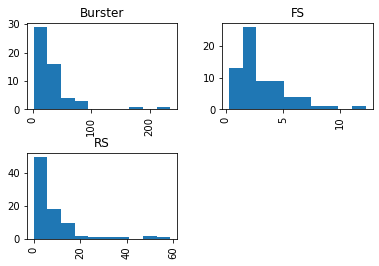

In [42]:
summary = group_comp('CImax', 'gmm', 'CI')
summary

{'p_welch': 0    0.000029
 Name: p-unc, dtype: float64,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.502179
 1  Burster_h         FS  0.001000
 2  Burster_h         RS  0.010422
 3  Burster_l         FS  0.001152
 4  Burster_l         RS  0.051856
 5         FS         RS  0.347886}

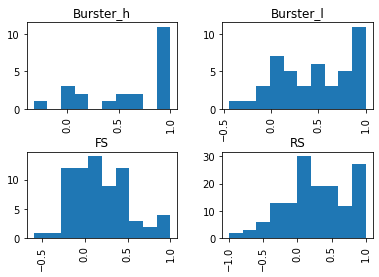

In [37]:
summary = group_comp('adaptindex','crit','Adaptindex')
summary

{'p_welch': 0    0.000015
 Name: p-unc, dtype: float64,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.060251
 1  Burster_h         FS  0.001000
 2  Burster_h         RS  0.001000
 3  Burster_l         FS  0.073952
 4  Burster_l         RS  0.219585
 5         FS         RS  0.828905}

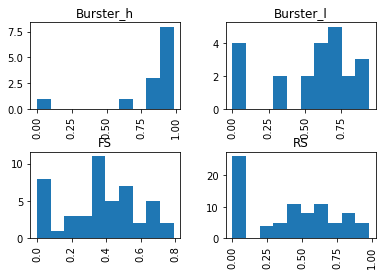

In [38]:
summary = group_comp('maxVS','crit','maxVS')
summary

{'p_levene': 0.03251247736951795,
 'p_welch': 0    0.000518
 Name: p-unc, dtype: float64,
 'Games-Howell':            A          B      pval
 0  Burster_h  Burster_l  0.034734
 1  Burster_h         FS  0.546203
 2  Burster_h         RS  0.011857
 3  Burster_l         FS  0.196268
 4  Burster_l         RS  0.587021
 5         FS         RS  0.022067}

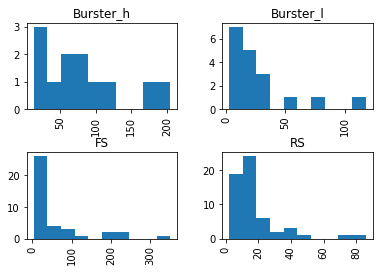

In [39]:
summary = group_comp('maxsync','crit','msf')
summary

{'p_welch': 0    0.000002
 Name: p-unc, dtype: float64,
 'Games-Howell':          A   B   pval
 0  Burster  FS  0.001
 1  Burster  RS  0.001
 2       FS  RS  0.900}

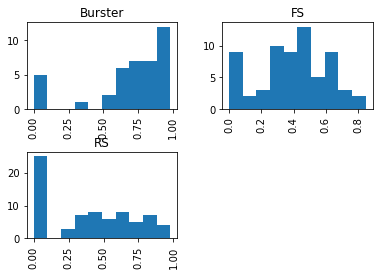

In [40]:
summary = group_comp('maxVS','gmm','maxVS')
summary

{'p_levene': 0.03368015935069996,
 'p_welch': 0    0.012474
 Name: p-unc, dtype: float64,
 'Games-Howell':          A   B      pval
 0  Burster  FS  0.721125
 1  Burster  RS  0.079940
 2       FS  RS  0.028907}

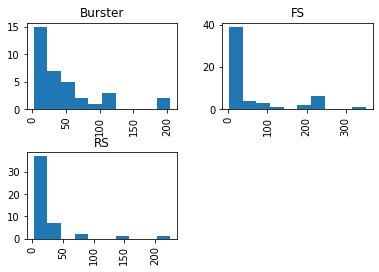

In [41]:
summary = group_comp('maxsync','gmm','msf')
summary